In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
import sys, os
import numpy as np
import lumapi


In [81]:
emeApi = lumapi.MODE()

In [82]:
def achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(funcao, x, xmin, xmax):

    peak = max(funcao)
    index = np.where(funcao==peak)[0][0]
    x_maximo = x[index]

    y_maximo = funcao[index]
    if (x_maximo<=xmax and x_maximo>=xmin):
        return round(x_maximo,3),round(y_maximo,3)
    return None, None

In [83]:
emeApi.importmaterialdb('silicon_thermal.mdf')

In [84]:
um = 1e-6
nm = 1e-9

thickness = 0.22*um
thick_BOX = 2*um

W_bragg = 1530*nm

width = 0.5*um # Waveguide width
Delta_W = 20*nm # Corrugation width
W_great = width+ Delta_W
W_small = width - Delta_W

L_pd = 324*nm # Grating period

W_ox = 3*um 
L_ex = 2*um # simulation size margins

material_Si ='silicon_thermal' #"Si (Silicon) - Palik"
material_BOX = "SiO2 (Glass) - Palik"

## Geometry

In [85]:
emeApi.deleteall()

#bragg grating
emeApi.addrect()
emeApi.set('x', -L_pd/4)
emeApi.set('x span', L_pd/2)
emeApi.set('y',0)
emeApi.set('y span', W_great)
emeApi.set('z',0)
emeApi.set('z span', thickness)
emeApi.set('material', material_Si)
emeApi.set('name', 'grt_big')

emeApi.addrect()
emeApi.set('x', L_pd/4)
emeApi.set('x span', L_pd/2)
emeApi.set('y',0)
emeApi.set('y span', W_small)
emeApi.set('z',0)
emeApi.set('z span', thickness)
emeApi.set('material', material_Si)
emeApi.set('name', 'grt_small')


In [86]:
emeApi.selectpartial('grt')
emeApi.addtogroup('grt_cell')
emeApi.select('grt_cell')
emeApi.selectpartial('grt_cell')
emeApi.addtogroup('bragg')

## Solver FDE

In [87]:
emeApi.switchtolayout()

emeApi.select('FDE')
emeApi.delete()

emeApi.addfde()
emeApi.set("simulation temperature", 298)
emeApi.set("background material", material_BOX)
emeApi.set("solver type", "2D X normal")
emeApi.set("y min bc", "Anti-Symmetric")
emeApi.set("y max bc", "Metal")
emeApi.set("z min bc", "Symmetric")
emeApi.set("y max bc", "Metal")
emeApi.set('x',-L_pd/4)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('y span', 3*width)
emeApi.set('z span', 3*thickness)

In [88]:
emeApi.select('mesh')
emeApi.delete()

emeApi.addmesh()
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('x span', L_pd)
emeApi.set('y span', 3*W_great)
emeApi.set('z span', 3*thickness)
emeApi.set("set mesh multiplier", 1)
emeApi.set('x mesh multiplier', 5)
emeApi.set('y mesh multiplier', 5)
emeApi.set('z mesh multiplier', 5)

In [89]:
emeApi.save("Bragg")

In [90]:
emeApi.switchtolayout()
emeApi.select("FDE")
emeApi.set("x", L_pd/4)
emeApi.findmodes()

group_index_high = np.abs(emeApi.getresult("FDE::data::mode1", "ng")[0][0])
neff_high = np.abs(emeApi.getresult("FDE::data::mode1", "neff")[0][0])
print("high index - ng = ", group_index_high," neff = ", neff_high)


emeApi.switchtolayout()
emeApi.select("FDE")
emeApi.set("x", -L_pd/4)
emeApi.findmodes()

group_index_low = np.abs(emeApi.getresult("FDE::data::mode1", "ng")[0][0])
neff_low = np.abs(emeApi.getresult("FDE::data::mode1", "neff")[0][0])
print("low index - ng = ", group_index_low," neff = ", neff_low)

high index - ng =  4.455372480362516  neff =  2.3905992783947383
low index - ng =  4.357813467947364  neff =  2.456719556901164


## Bragg periodicity ($\Lambda$)

$$
\Lambda = \frac{\lambda_{Bragg}}{2n_{eff}}
$$

Where,

$$
n_{eff} = \frac{{n_{eff}}_1+{n_{eff}}_2}{2}
$$

In [91]:
Lambda = W_bragg/((neff_low+neff_high))
print("Lambda = ", Lambda*1e9, " nm")

Lambda =  315.63840795023793  nm


## Change geometry

In [92]:
# emeApi.switchtolayout()
# emeApi.deleteall()

# #bragg grating
# emeApi.addrect()
# emeApi.set('x', -Lambda/4)
# emeApi.set('x span', Lambda/2)
# emeApi.set('y',0)
# emeApi.set('y span', W_great)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'grt_big')

# emeApi.addrect()
# emeApi.set('x', Lambda/4)
# emeApi.set('x span', Lambda/2)
# emeApi.set('y',0)
# emeApi.set('y span', W_small)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'grt_small')

# emeApi.selectpartial('grt')
# emeApi.addtogroup('grt_cell')
# emeApi.select('grt_cell')
# emeApi.selectpartial('grt_cell')
# emeApi.addtogroup('bragg')

# emeApi.addrect()
# emeApi.set('x', Lambda)
# emeApi.set('x span', Lambda)
# emeApi.set('y',0)
# emeApi.set('y span', width)
# emeApi.set('z',0)
# emeApi.set('z span', thickness)
# emeApi.set('material', material_Si)
# emeApi.set('name', 'Phase')

# emeApi.select("bragg")
# emeApi.copy()
# emeApi.set("name", "bragg2")
# emeApi.set("x", 2*Lambda)
# emeApi.set("first axis",'z')
# emeApi.set("rotation 1",180)

## Solver EME Temperature

In [93]:
Temperatura = np.linspace(25,75,11)+273

w_box = 2*width
t_box = 2*um
nb = 10000
wvg = np.linspace(1500e-9, 1600e-9, nb)


In [94]:
emeApi.switchtolayout()
emeApi.select('EME')
emeApi.delete()

emeApi.addeme()
emeApi.set("simulation temperature", Temperatura[0])
emeApi.set("solver type", "3D: X prop")
emeApi.set("energy conservation", "conserve energy")
emeApi.set("background material", material_BOX)
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)

emeApi.set("x min", -Lambda/2)
emeApi.set('y span', w_box)
emeApi.set('z span', t_box)

emeApi.set("number of cell groups", 2)
emeApi.set("number of modes for all cell groups", 1)
emeApi.set("group spans" , np.array([Lambda/2, Lambda/2]))
emeApi.set("display cells",1)

emeApi.set("number of periodic groups", 1)
emeApi.set("start cell group", 1)
emeApi.set("end cell group", 2)
emeApi.set("periods", 150)

emeApi.set("wavelength", 1500*nm)

In [95]:
emeApi.select('mesh')
emeApi.delete()

emeApi.addmesh()
emeApi.set("x", 0)
emeApi.set('z', 0)
emeApi.set('y', 0)
emeApi.set('x span', Lambda)
emeApi.set('y span', w_box)
emeApi.set('z span', t_box)
emeApi.set("set mesh multiplier", 1)
emeApi.set('x mesh multiplier', 5)
emeApi.set('y mesh multiplier', 5)
emeApi.set('z mesh multiplier', 5)

In [96]:
Transmissao_T = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []

for i in range(len(Temperatura)):
    emeApi.switchtolayout()

    T = Temperatura[i]

    emeApi.select('EME')
    emeApi.set("simulation temperature", T)
    # emeApi.select('cladding')
    # emeApi.set('index', n_cladding*(1+eta1*(T-273)+eta2*(T-273)**2))
    # emeApi.select('low')
    # emeApi.set('index', n_low*(1+eta1*(T-273)+eta2*(T-273)**2))
    # emeApi.select('high')
    # emeApi.set('index', n_high*(1+eta1*(T-273)+eta2*(T-273)**2))
    emeApi.run()

    emeApi.setemeanalysis("wavelength sweep", 1)
    emeApi.setemeanalysis("start wavelength",wvg[0])
    emeApi.setemeanalysis("stop wavelength",wvg[-1])
    emeApi.setemeanalysis("number of wavelength points", nb)
    emeApi.emesweep("wavelength sweep")

    Resultado = emeApi.getemesweep("S_wavelength_sweep")
    
    Transmissao_T.append(np.abs(Resultado['s11'])**2)
    S11_modulo.append(np.abs(Resultado['s11']))
    S11_fase.append(np.angle(Resultado['s11']))
    S21_modulo.append(np.abs(Resultado['s21']))
    S21_fase.append(np.angle(Resultado['s21']))
    


In [97]:
S11 = np.zeros((len(wvg), 2*len(Temperatura)))
S21 = np.zeros((len(wvg), 2*len(Temperatura)))

for i in range(0,len(Temperatura),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [98]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(Temperatura)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(Temperatura)):
    filename = f"bragg_temperature_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{Temperatura[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


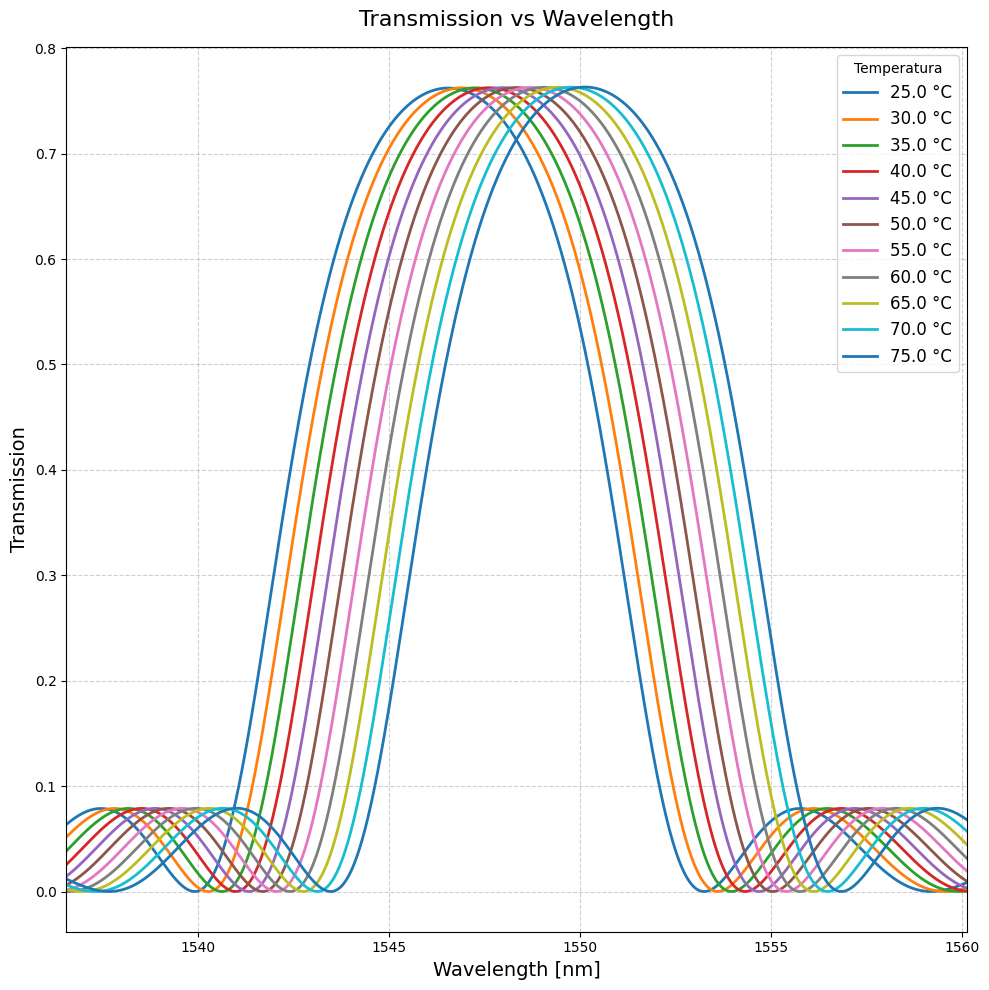

In [99]:
plt.figure(figsize=(10, 10))

# Estilo mais clean e colorido
for i in range(len(Temperatura)):
    plt.plot(
        wvg * 1e9,
        Transmissao_T[i],
        label=f"{Temperatura[i] - 273:.1f} °C",
        linewidth=2
    )

# Picos de referência
x_max1, _ = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(
    Transmissao_T[0], wvg*1e9, 1500, 1600
)
x_max2, _ = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(
    Transmissao_T[-1], wvg*1e9, 1500, 1600
)

plt.xlim(x_max1 - 10, x_max2 + 10)

# Labels e título
plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Transmission", fontsize=14)
plt.title("Transmission vs Wavelength", fontsize=16, pad=15)

# Estética
plt.legend(title="Temperatura", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("transmissao_vs_wavelength.png", dpi=300, bbox_inches="tight")

plt.show()


In [100]:
frequencia_onde_ocorre_maxima_transmissao = np.zeros(len(Temperatura))

for i in range(len(Temperatura)):
    x_max, y_max = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(Transmissao_T[i],wvg*1e9, 1500,1600)
    frequencia_onde_ocorre_maxima_transmissao[i] = (x_max)

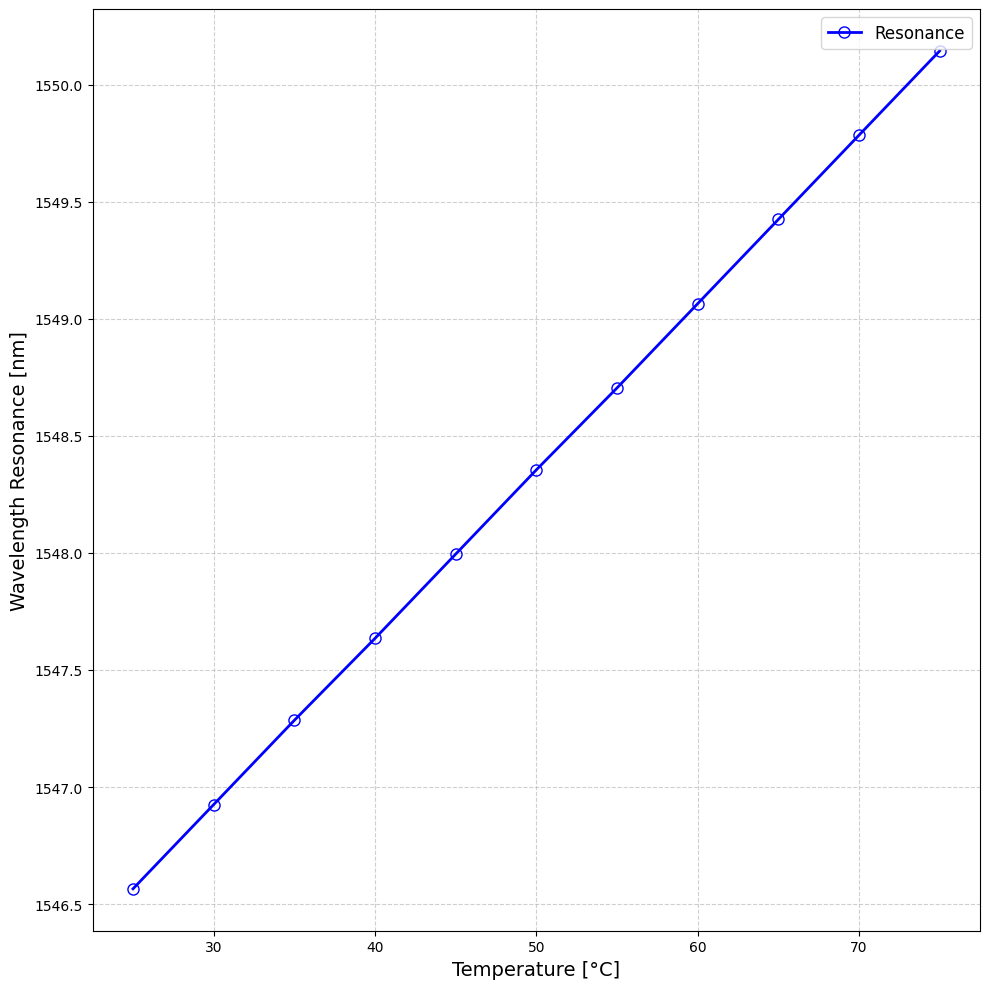

In [101]:
plt.figure(figsize=(10, 10))

# Linha azul com círculos vazados
plt.plot(
    Temperatura - 273,
    frequencia_onde_ocorre_maxima_transmissao,
    '-o',
    color='blue',
    markerfacecolor='none',  # bola vazada
    markersize=8,
    linewidth=2,
    label="Resonance"
)

# Labels e título
plt.xlabel("Temperature [°C]", fontsize=14)
plt.ylabel("Wavelength Resonance [nm]", fontsize=14)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("ressonancia_vs_temperatura.png", dpi=300, bbox_inches="tight")

plt.show()


## Solver EME Strain

$$
l = l_0(1+S)
$$


In [187]:
S = np.linspace(0,0.003,11)
Lambda_strain = Lambda*(1+S)
print(Lambda_strain*1e9, "nm")
print(S*1e3," milistrain")

[315.63840795 315.73309947 315.827791   315.92248252 316.01717404
 316.11186556 316.20655708 316.30124861 316.39594013 316.49063165
 316.58532317] nm
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]  milistrain


In [188]:
Transmissao = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []


for i in range(len(S)):
    
    emeApi.switchtolayout()
    emeApi.deleteall()

    #bragg grating
    emeApi.addrect()
    emeApi.set('x', -Lambda/4 * (1+S[i]))
    emeApi.set('x span', Lambda/2 * (1+S[i]))
    emeApi.set('y',0)
    emeApi.set('y span', W_great* (1+S[i]))
    emeApi.set('z',0)
    emeApi.set('z span', thickness * (1+S[i]))
    emeApi.set('material', material_Si)
    emeApi.set('name', 'grt_big')

    emeApi.addrect()
    emeApi.set('x', Lambda/4 * (1+S[i]))
    emeApi.set('x span', Lambda/2 * (1+S[i]))
    emeApi.set('y',0)
    emeApi.set('y span', W_small * (1+S[i]))
    emeApi.set('z',0)
    emeApi.set('z span', thickness* (1+S[i]))
    emeApi.set('material', material_Si)
    emeApi.set('name', 'grt_small')

    emeApi.addeme()
    emeApi.set("simulation temperature", 300)
    emeApi.set("solver type", "3D: X prop")
    emeApi.set("energy conservation", "conserve energy")
    emeApi.set("background material", material_BOX)
    emeApi.set("x", 0)
    emeApi.set('z', 0)
    emeApi.set('y', 0)

    emeApi.set("x min", -Lambda/2 * (1+S[i]))
    emeApi.set('y span', w_box * (1+S[i]))
    emeApi.set('z span', t_box * (1+S[i]))

    emeApi.set("number of cell groups", 2)
    emeApi.set("number of modes for all cell groups", 1)
    emeApi.set("group spans" , np.array([Lambda/2 * (1+S[i]), Lambda/2 * (1+S[i])]))
    emeApi.set("display cells",1)

    emeApi.set("number of periodic groups", 1)
    emeApi.set("start cell group", 1)
    emeApi.set("end cell group", 2)
    emeApi.set("periods", 150)

    emeApi.set("wavelength", 1500*nm)

    emeApi.addmesh()
    emeApi.set("x", 0)
    emeApi.set('z', 0)
    emeApi.set('y', 0)
    emeApi.set('x span', Lambda*(1+S[i]))
    emeApi.set('y span', w_box*(1+S[i]))
    emeApi.set('z span', t_box*(1+S[i]))
    emeApi.set("set mesh multiplier", 1)
    emeApi.set('x mesh multiplier', 5)
    emeApi.set('y mesh multiplier', 5)
    emeApi.set('z mesh multiplier', 5)

    emeApi.run()

    emeApi.setemeanalysis("wavelength sweep", 1)
    emeApi.setemeanalysis("start wavelength",wvg[0])
    emeApi.setemeanalysis("stop wavelength",wvg[-1])
    emeApi.setemeanalysis("number of wavelength points", nb)
    emeApi.emesweep("wavelength sweep")

    Resultado = emeApi.getemesweep("S_wavelength_sweep")
    
    Transmissao.append(np.abs(Resultado['s11'])**2)
    S11_modulo.append(np.abs(Resultado['s11']))
    S11_fase.append(np.angle(Resultado['s11']))
    S21_modulo.append(np.abs(Resultado['s21']))
    S21_fase.append(np.angle(Resultado['s21']))

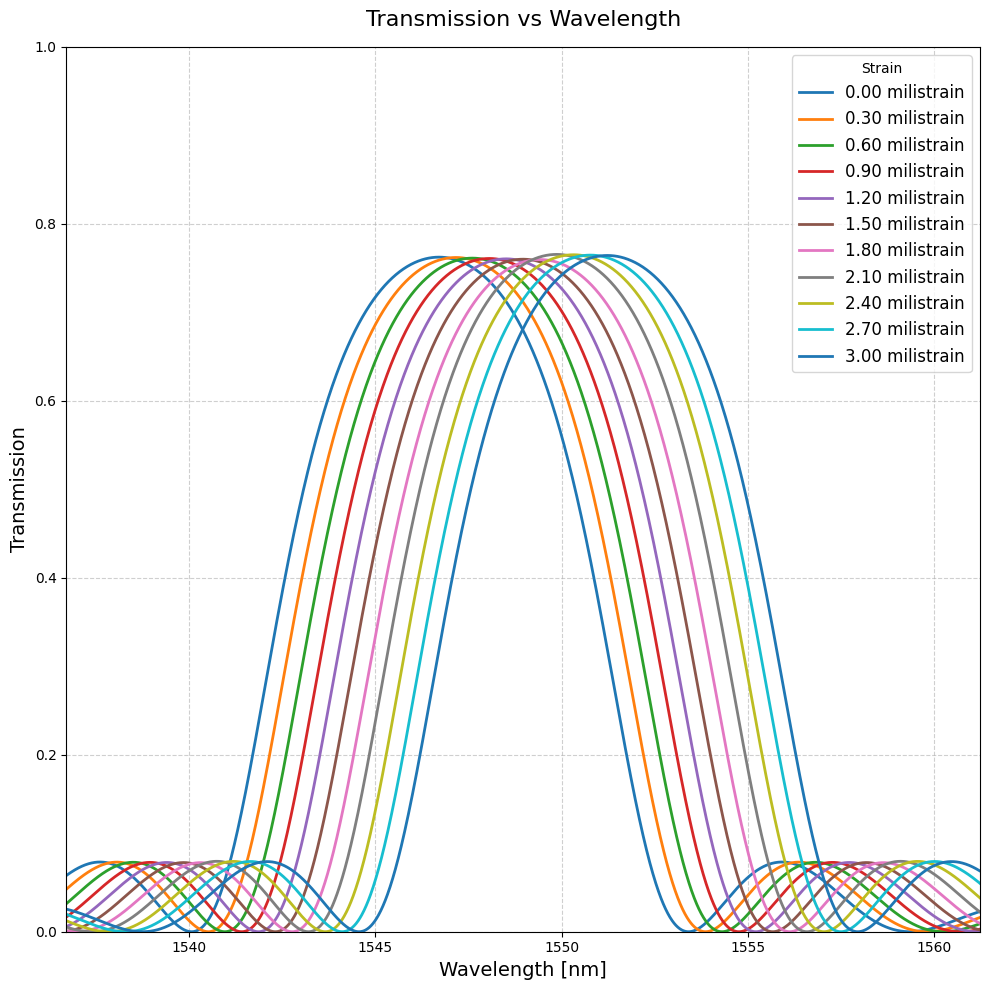

In [208]:
plt.figure(figsize=(10, 10))

# Plot com linhas + bolas vazadas
for i in range(len(S)):
    plt.plot(
        wvg * 1e9,
        Transmissao[i],
        markerfacecolor='none',  # bola vazada
        markersize=6,
        linewidth=2,
        label=fr"{S[i]*1000:.2f} milistrain"
    )

# Limites de x pelo pico inicial/final
x_max_S1, _ = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(
    Transmissao[0], wvg*1e9, 1500, 1600
)
x_max_S2, _ = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(
    Transmissao[-1], wvg*1e9, 1500, 1600
)

plt.xlim(x_max_S1 - 10, x_max_S2 + 10)
plt.ylim(0, 1)

# Labels e título
plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Transmission", fontsize=14)
plt.title("Transmission vs Wavelength", fontsize=16, pad=15)

# Estética
plt.legend(title="Strain", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar imagem em alta resolução
plt.savefig("transmissao_vs_wavelength_strain.png", dpi=300, bbox_inches="tight")

plt.show()



In [209]:
frequencia_onde_ocorre_maxima_transmissao = np.zeros(len(S))

for i in range(len(S)):
    x_max, y_max = achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(Transmissao[i],wvg*1e9, 1500,1600)
    frequencia_onde_ocorre_maxima_transmissao[i] = (x_max)

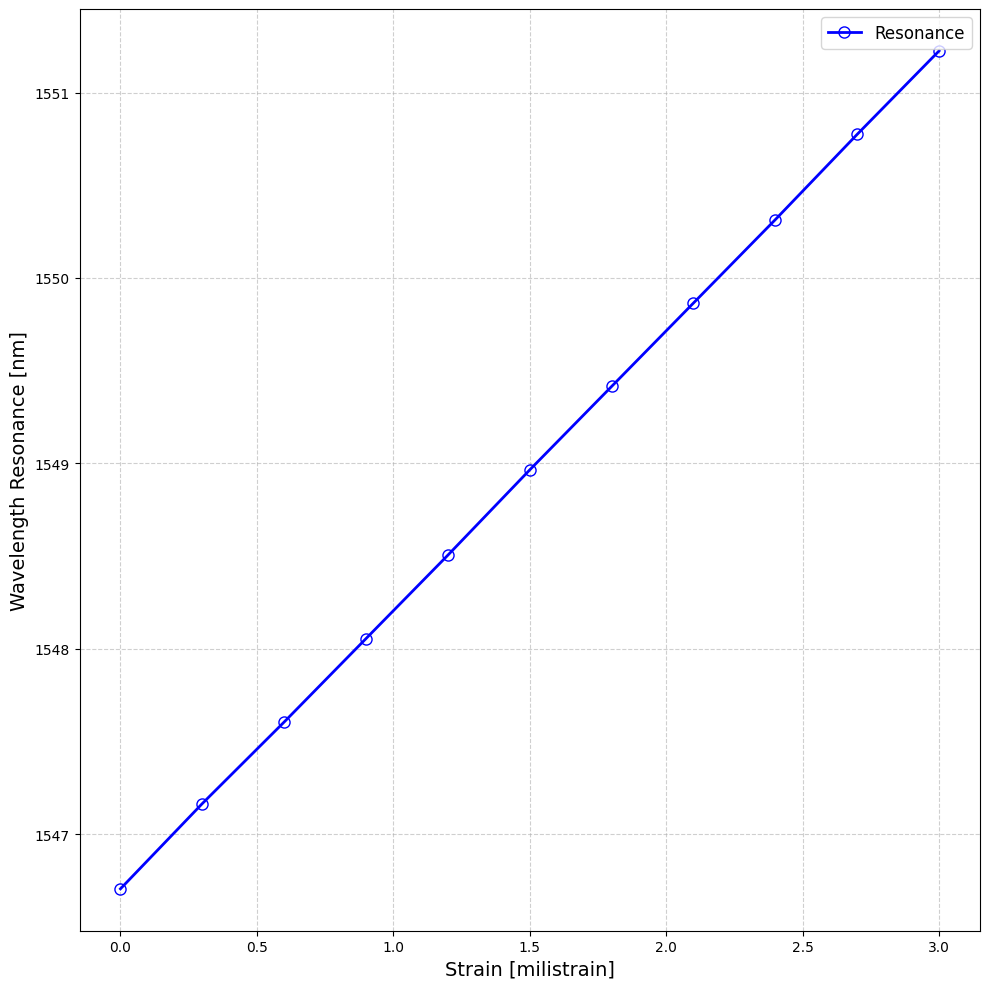

In [210]:
plt.figure(figsize=(10, 10))

# Linha azul com círculos vazados
plt.plot(
    S*1e3,
    frequencia_onde_ocorre_maxima_transmissao,
    '-o',
    color='blue',
    markerfacecolor='none',  # bola vazada
    markersize=8,
    linewidth=2,
    label="Resonance"
)

# Labels e título
plt.xlabel("Strain [milistrain]", fontsize=14)
plt.ylabel("Wavelength Resonance [nm]", fontsize=14)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("ressonancia_vs_strain.png", dpi=300, bbox_inches="tight")

plt.show()


In [211]:
S11 = np.zeros((len(wvg), 2*len(S)))
S21 = np.zeros((len(wvg), 2*len(S)))

for i in range(0,len(S),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [212]:
print(S11[:,13])

[ 1.05735752  1.05188909  1.04642076 ... -3.10469557 -3.11019614
 -3.11575778]


In [213]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(S)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(S)):
    filename = f"bragg_strain_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{S[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


## Interconnect

In [214]:
inter = lumapi.INTERCONNECT()

## Create simulation ambience

In [215]:
comprimentos_de_onda = []
TE_gain_1 = []

for i in range(len(S)):
    inter.switchtolayout()
    inter.deleteall()

    inter.addelement("Optical Network Analyzer")
    inter.set("number of points",100000)
    inter.set("number of input ports",2)
    inter.set("input parameter",2)
    inter.set("start frequency", c/(1530e-9))
    inter.set("stop frequency", c/(1600e-9))

    inter.addelement("Optical N Port S-Parameter")
    inter.set("name","spars1")
    inter.set("load from file", True)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\SILICON BRAGG\bragg_strain_"+f"{i}.dat")

    inter.setposition("ONA_1", 0,0)
    inter.setposition("spars1", 0,200)

    inter.connect("ONA_1","output", "spars1", "port 1")
    inter.connect("ONA_1","input 1", "spars1", "port 2")
    inter.connect("ONA_1","input 2", "spars1", "port 1")

    inter.run()

    TE_gain_1.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")["TE gain (dB)"]))

    comprimentos_de_onda.append(np.squeeze(inter.getresult("ONA_1","input 1/mode 1/gain")['wavelength']))

In [216]:
print(frequencia_onde_ocorre_maxima_transmissao)
# len_S = len(frequencia_onde_ocorre_maxima_transmissao)
# x_max11 = frequencia_onde_ocorre_maxima_transmissao[int(0.5*(len_S-1))]
# print(x_max11)

[1546.705 1547.165 1547.605 1548.055 1548.505 1548.965 1549.415 1549.865
 1550.315 1550.775 1551.225]


## Strain variation

In [217]:
pmS1 = []
pmS2 = []

for i in range(len(S)):
    inter.switchtolayout()
    inter.deleteall()

    inter.addelement("CW Laser")
    inter.set("name", "fonte1")
    inter.set("frequency", 3e8/(1e-9*x_max_S1))

    inter.addelement("CW Laser")
    inter.set("name", "fonte2")
    inter.set("frequency", 3e8/((x_max_S2)*1e-9))

    inter.addelement("Optical Combiner")
    inter.set("name", "optC1")

    inter.addelement("Optical Combiner")
    inter.set("configuration", "splitter")
    inter.set("name", "optS1")
    inter.rotateelement("optS1")
    inter.rotateelement("optS1")

    inter.addelement("Optical N Port S-Parameter")
    inter.set("name","spars1")
    inter.set("load from file", True)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\SILICON BRAGG\bragg_strain_"+f"{i+1}.dat")

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter1")
    inter.set("frequency", 3e8/(x_max_S1*1e-9))

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter2")
    inter.set("frequency", 3e8/((x_max_S2)*1e-9))

    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec1")
    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec2")

    inter.addelement("Power Meter")
    inter.set("name", "PM1")
    inter.addelement("Power Meter")
    inter.set("name","PM2")

    inter.setposition("fonte1", 0,0)
    inter.setposition("fonte1", 0,200)

    inter.setposition("optC1", 200,100)
    inter.setposition("spars1", 400,100)
    inter.setposition("optS1", 600,100)

    inter.setposition("filter1", 800,0)
    inter.setposition("filter2", 800,200)

    inter.setposition("photodec1", 1000,0)
    inter.setposition("photodec2", 1000,200)

    inter.setposition("PM1", 1200,0)
    inter.setposition("PM2", 1200,200)

    inter.connect("fonte2", "output", "optC1", "input 1")
    inter.connect("fonte1", "output", "optC1", "input 2")

    inter.connect("optC1", "output", "spars1", "port 1")
    inter.connect("spars1", "port 2", "optS1", "input")

    inter.connect("filter1", "input", "optS1", "output 2")
    inter.connect("filter2", "input", "optS1", "output 1")

    inter.connect("photodec1", "input", "filter1", "output")
    inter.connect("photodec2", "input", "filter2", "output")

    inter.connect("PM1", "input", "photodec1", "output")
    inter.connect("PM2", "input", "photodec2", "output")

    inter.run()

    pmS1.append(inter.getresult("PM1","total power"))
    pmS2.append(inter.getresult("PM2","total power"))

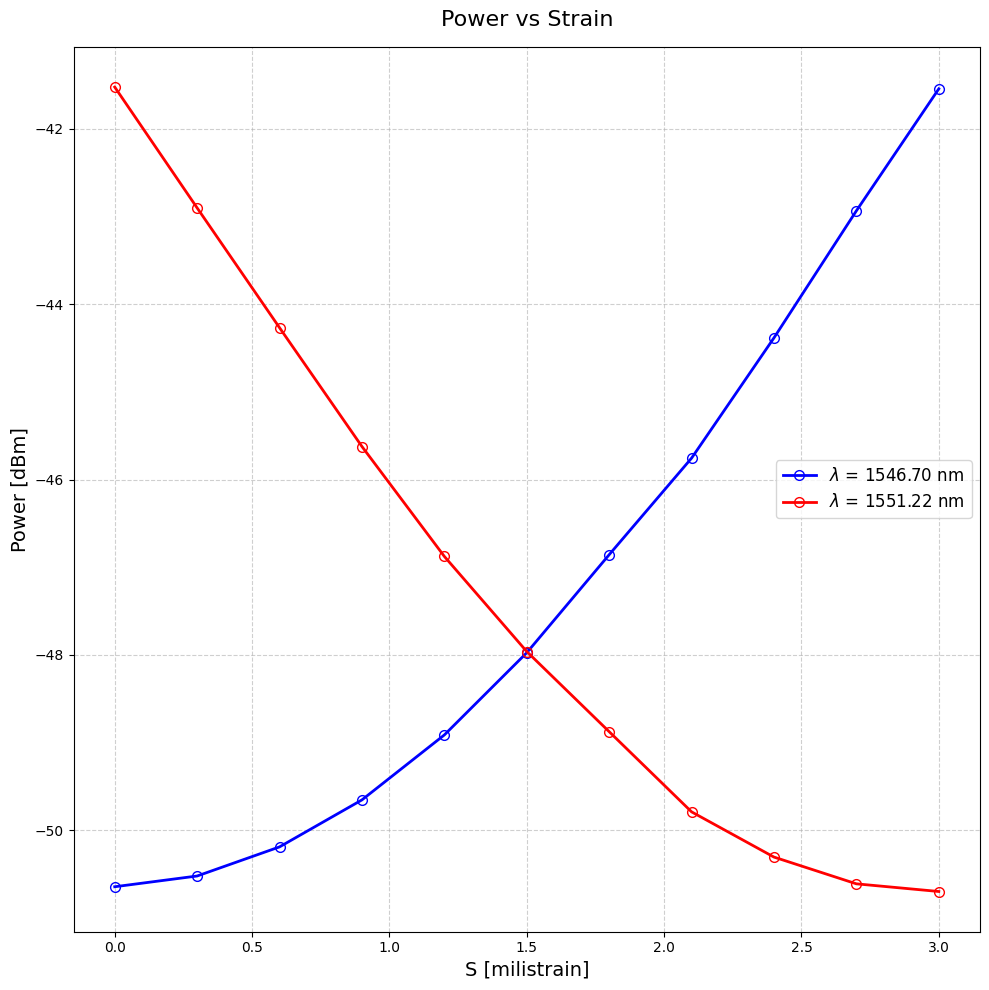

In [218]:
plt.figure(figsize=(10, 10))

# Linha 1 com bolas vazadas
plt.plot(
    S*1e3, pmS1,
    '-o',
    color='blue',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
    label=fr"$\lambda$ = {x_max_S1:.2f} nm"
)

# Linha 2 com bolas vazadas
plt.plot(
    S*1e3, pmS2,
    '-o',
    color='red',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
    label=fr"$\lambda$ = {x_max_S2:.2f} nm"
)

# Labels e título
plt.xlabel("S [milistrain]", fontsize=14)
plt.ylabel("Power [dBm]", fontsize=14)
plt.title("Power vs Strain", fontsize=16, pad=15)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("potencia_vs_strain.png", dpi=300, bbox_inches="tight")

plt.show()


## Temperature variation

In [219]:
pmT1 = []
pmT2 = []

for i in range(len(Temperatura)):
    inter.switchtolayout()
    inter.deleteall()

    inter.addelement("CW Laser")
    inter.set("name", "fonte1")
    inter.set("frequency", 3e8/(1e-9*x_max1))

    inter.addelement("CW Laser")
    inter.set("name", "fonte2")
    inter.set("frequency", 3e8/((x_max2)*1e-9))

    inter.addelement("Optical Combiner")
    inter.set("name", "optC1")

    inter.addelement("Optical Combiner")
    inter.set("configuration", "splitter")
    inter.set("name", "optS1")
    inter.rotateelement("optS1")
    inter.rotateelement("optS1")

    inter.addelement("Optical N Port S-Parameter")
    inter.set("name","spars1")
    inter.set("load from file", True)
    inter.set("s parameters filename", r"C:\Users\gson5\Downloads\Photonics-API-lumapi\SILICON BRAGG\bragg_temperature_"+f"{i+1}.dat")

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter1")
    inter.set("frequency", 3e8/(1e-9*x_max1))

    inter.addelement("Rectangular Optical Filter")
    inter.set("name","filter2")
    inter.set("frequency", 3e8/((x_max2)*1e-9))

    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec1")
    inter.addelement("PIN Photodetector")
    inter.set("name", "photodec2")

    inter.addelement("Power Meter")
    inter.set("name", "PM1")
    inter.addelement("Power Meter")
    inter.set("name","PM2")

    inter.setposition("fonte1", 0,0)
    inter.setposition("fonte1", 0,200)

    inter.setposition("optC1", 200,100)
    inter.setposition("spars1", 400,100)
    inter.setposition("optS1", 600,100)

    inter.setposition("filter1", 800,0)
    inter.setposition("filter2", 800,200)

    inter.setposition("photodec1", 1000,0)
    inter.setposition("photodec2", 1000,200)

    inter.setposition("PM1", 1200,0)
    inter.setposition("PM2", 1200,200)

    inter.connect("fonte2", "output", "optC1", "input 1")
    inter.connect("fonte1", "output", "optC1", "input 2")

    inter.connect("optC1", "output", "spars1", "port 1")
    inter.connect("spars1", "port 2", "optS1", "input")

    inter.connect("filter1", "input", "optS1", "output 2")
    inter.connect("filter2", "input", "optS1", "output 1")

    inter.connect("photodec1", "input", "filter1", "output")
    inter.connect("photodec2", "input", "filter2", "output")

    inter.connect("PM1", "input", "photodec1", "output")
    inter.connect("PM2", "input", "photodec2", "output")

    inter.run()

    pmT1.append(inter.getresult("PM1","total power"))
    pmT2.append(inter.getresult("PM2","total power"))

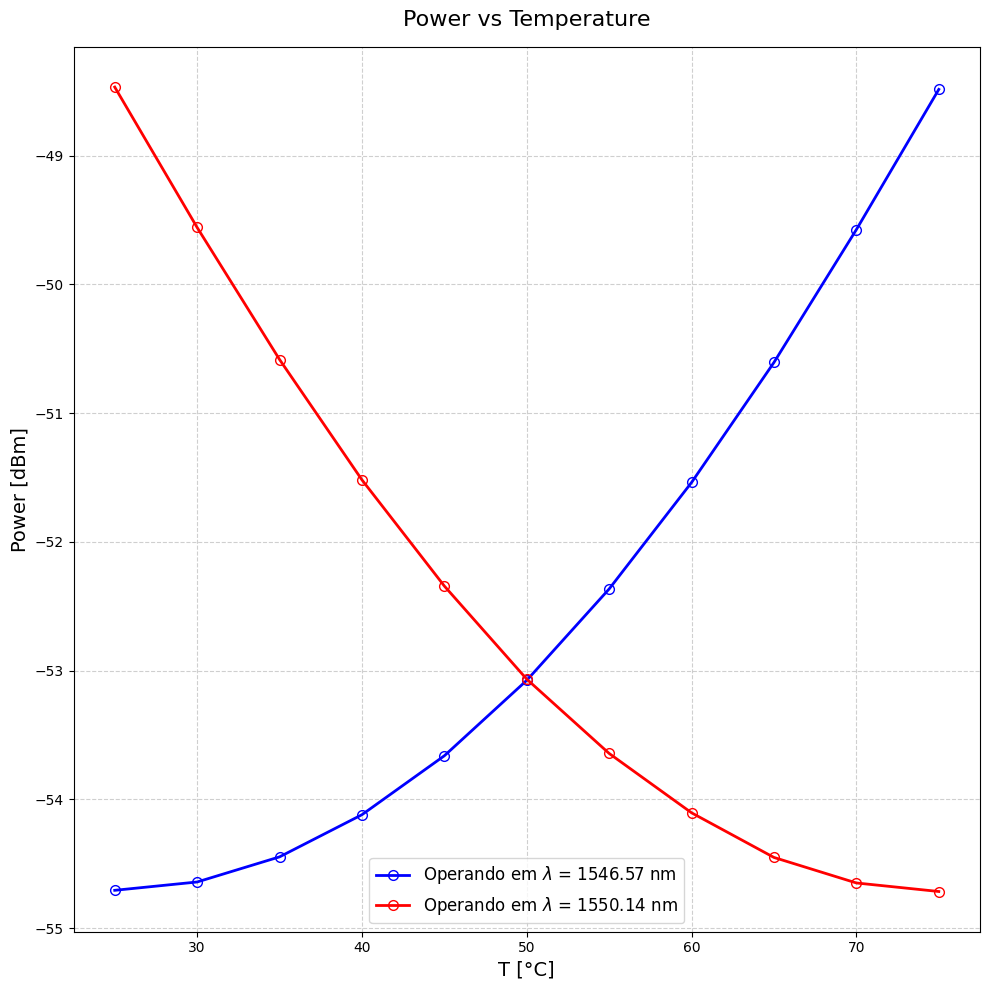

In [220]:
plt.figure(figsize=(10, 10))

# Curva 1 com bolas vazadas
plt.plot(
    Temperatura - 273, pmT1,
    '-o',
    color='blue',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
    label=fr"Operando em $\lambda$ = {x_max1:.2f} nm"
)

# Curva 2 com bolas vazadas
plt.plot(
    Temperatura - 273, pmT2,
    '-o',
    color='red',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
    label=fr"Operando em $\lambda$ = {x_max2:.2f} nm"
)

# Labels e título
plt.xlabel("T [°C]", fontsize=14)
plt.ylabel("Power [dBm]", fontsize=14)
plt.title("Power vs Temperature", fontsize=16, pad=15)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("potencia_vs_temperatura.png", dpi=300, bbox_inches="tight")

plt.show()


## Razão de potências

C:\Users\gson5\AppData\Local\Temp\ipykernel_31776\1578146556.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


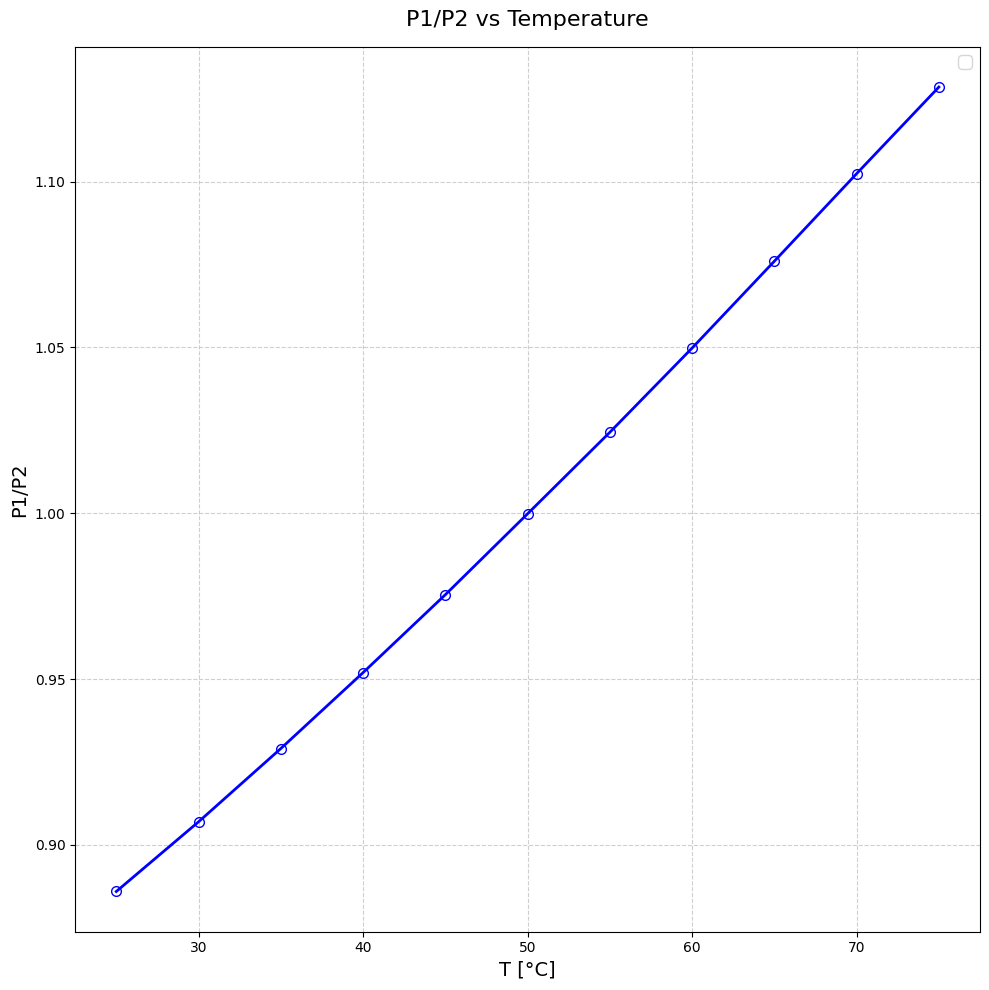

In [222]:
plt.figure(figsize=(10, 10))

# Curva 1 com bolas vazadas
plt.plot(
    Temperatura - 273, np.array(pmT2)/np.array(pmT1),
    '-o',
    color='blue',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
)

# Labels e título
plt.xlabel("T [°C]", fontsize=14)
plt.ylabel("P1/P2", fontsize=14)
plt.title("P1/P2 vs Temperature", fontsize=16, pad=15)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("razao_potencia_vs_temperatura.png", dpi=300, bbox_inches="tight")

plt.show()


C:\Users\gson5\AppData\Local\Temp\ipykernel_31776\789678132.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


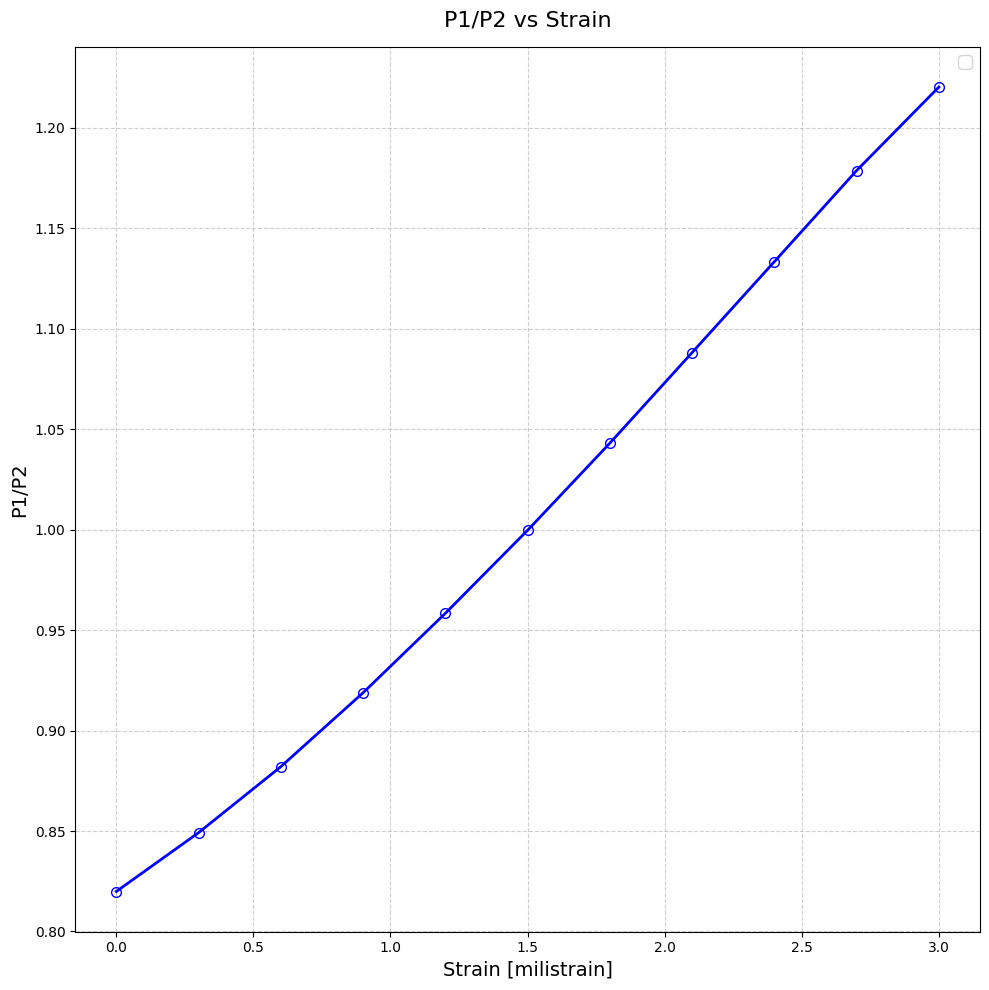

In [223]:
plt.figure(figsize=(10, 10))

# Curva 1 com bolas vazadas
plt.plot(
    S*1e3, np.array(pmS2)/np.array(pmS1),
    '-o',
    color='blue',
    markerfacecolor='none',
    markersize=7,
    linewidth=2,
)

# Labels e título
plt.xlabel("Strain [milistrain]", fontsize=14)
plt.ylabel("P1/P2", fontsize=14)
plt.title("P1/P2 vs Strain", fontsize=16, pad=15)

# Estética
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("razao_potencia_vs_strain.png", dpi=300, bbox_inches="tight")

plt.show()
